# Ordinary differential equations
### Carl Fredrik Berg, NTNU, 2023

## Introduction

The Euler method(s) are the most basic numerical methods to solve ordinary differential equations with a given initial value. We will look at two different Euler methods, the forward and backward methods. These are simple examples of explicit and implicit solution methods.

The methods are named after Leonhard Euler, a particularly prolific mathematician in the 1700s. Among else, Euler is known for starting graph theory with his solution to the <i>Königsberger Brückenproblem</i>.

## Ordinary differential equations

<i>Ordinary differential equations</i> (ODE) are equations consisting of functions and derivatives of these functions of one single variable. This is in contrast to partial differential equations which have several variables.

An ODE of first order is then an equation of the form
$$\begin{align}
y'(t) &= f(t,y(t)) \\
y(t_0) &= y_0
\end{align}$$
Here $t$ is the variable and $y(t)$ is the function. Since this equation is of first order, we only have first derivatives of $y(t)$.

A classical example of a ODE is the description of the velocity of a falling body:
$$\begin{align}
v'(t) &= g \\
v(0) &= 0
\end{align}$$
Here $g$ is the acceleration due to gravity. (Note that our axes is pointing in direction of gravity, thus downwards towards earth.) This is an example of an ODE that can be solved analytically, giving $v(t) = gt$.

Another example is the position of a falling body. The derivative of the position is the velocity, which we already know is $gt$, so we get
$$\begin{align}
y'(t) &= gt \\
y(0) &= 0
\end{align}$$
Note that, since our axis is pointing downwards, this gives the distance the object has traveled after a time $t$.

Again, this is also an equation that can be solved analytically. Other ODEs can not be solved analytically, for example the following:
$$\begin{align}
y'(t) &= t^3+y^2(t) \\
y(0) &= 0
\end{align}$$


## Forward Euler method

Assume an ODE $y' = f(t,y)$ together with an initial value $y(t_0) = y_0$. The <i>forward Euler method</i>, also known as the <i>explicit Euler method</i>, try to approximate the curve $y$ by taking small steps along the tangent line given by the derivative $y'$.

The starting point $(t_0,y_0)$ is known, so we can approximate the next point along $y$ as
$$y_1 = y_0 + f(t_0,y_0)(t_1-t_0)$$
Here we write $y_1$ for the numerical approximation of $y(t_1)$. The reason for using another notation is to distinguish between the numerical approximation and actual value of $y$ at point $t_1$. Thus we have that $y_1 \simeq y(t_1)$.

Note that we could have chosen to use the derivative at any point between $t_0$ and $t_1$; the explicit or forward method is using the current point $t_0$. We will see that the backward or implicit method use the point $t_1$.

We then iterate this method, with
$$y_{i+1} = y_i + f(t_i,y_i)(t_{i+1}-t_i)$$
We then have the numerical approximation $y_{i+1} \simeq y(t_{i+1})$. Note that we only estimate the curve in discrete points given by the steps $t_i$.

Unfortunately, when we iterate this process, the error from the previous approximation can be propagated through the subsequent approximations. Still, the approximation is fair as long as the step size $\Delta t = t_{i+1} - t_i$ is kept small.

### Example: Velocity of falling body

Let us use the forward Euler method to solve the classical falling object equation:
$$\begin{align}
v'(t) &= g \\
v(0) &= 0
\end{align}$$
This equation actually have an analytical solution, which is handy, as this allows us to compare the numerical solution to the exact solution.

Let $h = t_{i+1} - t_i$ be a constant step length. Then we see that 
$$\begin{align}
v_0 &= 0 \\
v_1 &= v_0 + h v'(0) = 0 + h g = h g \\
v_2 &= v_1 + h v'(h) = hg + hg = 2hg \\
\vdots \\
v_n &= nhg
\end{align}$$

Since we know the exact solution $v(t) = gt$, we can compare the solutions above with the exact solution, which then are
$$\begin{align}
v(0) &= 0 \\
v(h) &= h g \\
v(2h) &= 2hg \\
\vdots \\
v(nh) &= nhg
\end{align}$$
Thus we see that the numerical approximation gives the exact solution in this case.


### Example: Position of falling body

We will continue with a slightly more interesting example. Let us now consider the position of the falling object:
$$\begin{align}
y'(t) &= gt \\
y(0) &= 0
\end{align}$$
Again, this equation have an analytical solution, so we can again compare the numerical solution to the exact solution.

As above, let $h = t_{i+1} - t_i$ be a constant step length. Then we see that 
$$\begin{align}
y_0 &= 0 \\
y_1 &= y_0 + h y'(0) = 0 + h g 0 = 0 \\
y_2 &= y_1 + h y'(h) = 0 + h g h = h^2 g \\
y_3 &= y_2 + h y'(2h) = h^2 g + h g 2h = 3 h^2 g \end{align}$$

The exact solution is $y(t) = \frac{1}{2}gt^2$, which gives
$$\begin{align}
y(0) &= 0 \\
y(h) &= \frac{1}{2}h^2 g \\
y(2h) &= \frac{1}{2}(2h)^2 g = 2 h^2 g \\
y(3h) &= \frac{1}{2}(3h)^2 g = \frac{9}{2} h^2 g
\end{align}$$
Thus we see that there is an error in our numerical approximation.

To compare the solutions we can test the forward Euler method through a Pyton script:

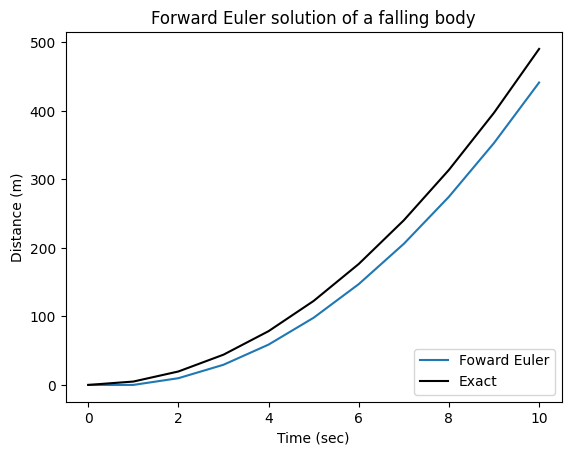

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Total time
tt=10.0
#Number of time intervals
N=11
#Acceleration due to gravity
g=9.81
#Time axis
t= np.linspace(0.0,tt,N)
#Forward Euler Solution array
yf=np.zeros(N)
#Exact solution array
yex=np.copy(yf)
#Time interval
h=tt/(N-1)

#Initial conditions
yf[0]=0.0
#Forward Euler solution
for i in range(1,N):
  yf[i] = yf[i-1]+h*g*(i-1)*h

#Exact solution
for i in range(0,N):
  yex[i] = 0.5*g*(h*i)**2

plt.plot(t,yf,label="Foward Euler")
plt.plot(t,yex,label="Exact",color='k')
plt.xlabel("Time (sec)")
plt.ylabel("Distance (m)")
plt.legend(loc='lower right')
plt.title("Forward Euler solution of a falling body")
plt.show()


By a Taylor expansion, we can show that the error for the forward Euler method is of order $\mathcal{0}(h)$, thus it is of first order in the step length.

## Backward Euler method

In the forward (explicit) Euler method, we evaluated the derivative in the current position. In the backward (implicit) Euler method we will evaluate the derivative in the next position. In some sense, we will then evaluate the ODE in the next position, and use extra information from "back in time" to build our equation for obtaining the next step.

As before, assume an ODE of first order together with its initial condition:
$$\begin{align}
y'(t) &= f(t,y(t)) \\
y(t_0) &= y_0
\end{align}$$
We will then iteratively obtain new solutions as
$$y_{i+1} = y_i + f(t_{i+1},y_{i+1})(t_{i+1}-t_i)$$
Note the difference from the forward Euler method, with the derivative evaluated at $(t_{i+1},y_{i+1})$ instead of $(t_{i},y_i)$.

In the equation above we have the unknown value $y_{i+1}$ on both the left and right hand side of the equation above. This means that we (might) need to solve an algebraic equation to obtain the value of $y_{i+1}$. This is the characteristic for an implicit method; the solution is not just an explicit equation, but involves an algebraic solution. This might increase the computational effort to obtain the solution. This is typical for implicit methods; they are in general more computational intensive, but might also yield better results.


### Example revisited: Velocity of falling body

Let us revisit the falling body example, but this time use the backward Euler method to solve the classical falling object equation:
$$\begin{align}
v'(t) &= g \\
v(0) &= 0
\end{align}$$

Let $h = t_{i+1} - t_i$ be a constant step length. Then we see that the backward Euler method will give us the following values:
$$\begin{align}
v_0 &= 0 \\
v_1 &= v_0 + h v'(1) = 0 + h g = h g \\
v_2 &= v_1 + h v'(h+1) = hg + hg = 2hg \\
\vdots \\
v_n &= nhg
\end{align}$$
Thus, since the derivative is independent of the time $t$, we natuarlly get the same solution for both forward and backward Euler methods. We also remember that the numerical results matched the analyitcal values, thus the backward Euler method will also give exact results.

### Example revisited: Position of falling body

Let us then move on to the more interesting example of the position of a falling body:
$$\begin{align}
y'(t) &= gt \\
y(0) &= 0
\end{align}$$

As above, let $h = t_{i+1} - t_i$ be a constant step length. Then we see that the backward Euler method gives us the following:
$$\begin{align}
y_0 &= 0 \\
y_1 &= y_0 + h y'(1) = 0 + h g h = h^2 g \\
y_2 &= y_1 + h y'(h) = h^2 g + h g 2h = 3 h^2 g \\
y_3 &= y_2 + h y'(2h) = 3 h^2 g + h g 3h = 6 h^2 g \end{align}$$
Note that, for this particular example, also the backward Euler method gave us an explicit expression. The reason is that the description of $y'(t)$ does not involve $y$.


The exact solution is $y(t) = \frac{1}{2}gt^2$, which gives
$$\begin{align}
y(0) &= 0 \\
y(h) &= \frac{1}{2}h^2 g \\
y(2h) &= \frac{1}{2}(2h)^2 g = 2 h^2 g \\
y(3h) &= \frac{1}{2}(3h)^2 g = \frac{9}{2} h^2 g
\end{align}$$
Thus we see that there is an error in our numerical approximation. While the forward Euler method was constantly underestimating the analytical values, we see that the forward Euler method is constantly overestimating the analytical values.

Let us try to solve this using a Python code.

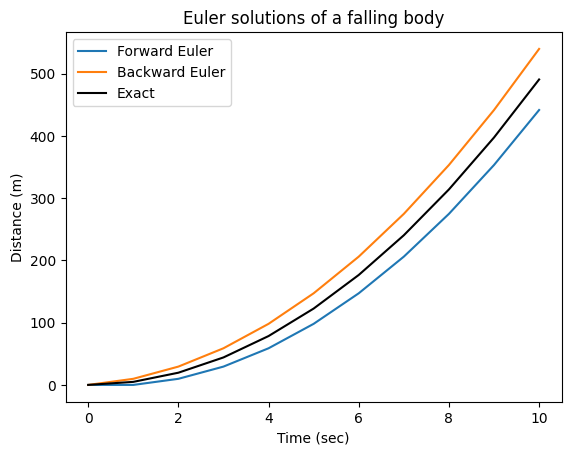

In [7]:
#Backward Euler Solution array
yb=np.zeros(N)

#Initial condition
yb[0]=0.0
#Backward Euler solution
for i in range(1,N):
  yb[i] = yb[i-1]+h*g*i*h

plt.plot(t,yf,label="Forward Euler")
plt.plot(t,yb,label="Backward Euler")
plt.plot(t,yex,label="Exact", color='k')
plt.xlabel("Time (sec)")
plt.ylabel("Distance (m)")
plt.legend()
plt.title("Euler solutions of a falling body")
plt.show()


We observe that when the analytical curve is concave up, the forward method will underestimate the exact solution while the backward method will overestimate the exact solution. For a curve that is concave down we will have the oposite, the forward will overestimate and the backward will underestimate. This is because the either overestimate or underestimate the slope of the line between the current and next position, as the current or next position derivative is over/under representing the slope between the current and next point. The next method goes some way to remedy this inherent issue with the Euler methods.

## Heun's method

A method which in some sense is in between the forward and backward Euler methods is called <i>Heun's method</i>. It named after the german mathematician Karl Heun who introduced the method. It improves on the Euler methods by using an intermediate value for the approximated next value, which is then used to improve the solution.

As before, assume an ODE of first order together with its initial condition:
$$\begin{align}
y'(t) &= f(t,y(t)) \\
y(t_0) &= y_0
\end{align}$$

With Heun's method we will first approximate the next solution using the forward Euler method:
$$\tilde{y}_{i+1} = y_i + f(t_i,y_i)(t_{i+1}-t_i)$$
With this estimation for the next point, we can then estimate the next point using a weighted average of the derivative in the current and next point:
$$y_{i+1} = y_i + \frac{f(t_i,y_i) + f(t_{i+1},\tilde{y}_{i+1})}{2}(t_{i+1}-t_i)$$

Note that Heun's method consists of the explicit equations, thus there is no need for an implicit (possibly complicated) solution to an algebraic equation.


### Example revisited again: Position of falling body

We still work with the example of the position of a falling body:
$$\begin{align}
y'(t) &= gt \\
y(0) &= 0
\end{align}$$

As above, let $h = t_{i+1} - t_i$ be a constant step length. Note that $y$ is not a part of $f(t,y) = gt$, so we do not need to calculate the $\tilde{y}_i$ parameter for this particular case. We then have the following:
$$\begin{align}
y_0 &= 0 \\
y_1 &= y_0 + \frac{h}{2}(f(t_0,y_0) + f(t_{1},\tilde{y}_{1}))  = 0 + \frac{h}{2} ( g 0 + g h) = \frac{1}{2} h^2 g \\
y_2 &= y_1 + \frac{h}{2}(f(t_1,y_1) + f(t_{2},\tilde{y}_{2})) = \frac{1}{2} h^2 g + \frac{h}{2} (g h + g 2h) = 2 h^2 g \\
y_3 &= y_2 + \frac{h}{2}(f(t_2,y_2) + f(t_{3},\tilde{y}_{3})) = 2 h^2 g + \frac{h}{2} (g 2h + g 3h) = \frac{9}{2} h^2 g \end{align}$$

The exact solution is $y(t) = \frac{1}{2}gt^2$, which gives
$$\begin{align}
y(0) &= 0 \\
y(h) &= \frac{1}{2}h^2 g \\
y(2h) &= \frac{1}{2}(2h)^2 g = 2 h^2 g \\
y(3h) &= \frac{1}{2}(3h)^2 g = \frac{9}{2} h^2 g
\end{align}$$
Thus we see that Heun's method is spot on. This is not always the case, there will be examples where also the Heun's method gives an error.

Let us continue our Python code to include the Heun's method.

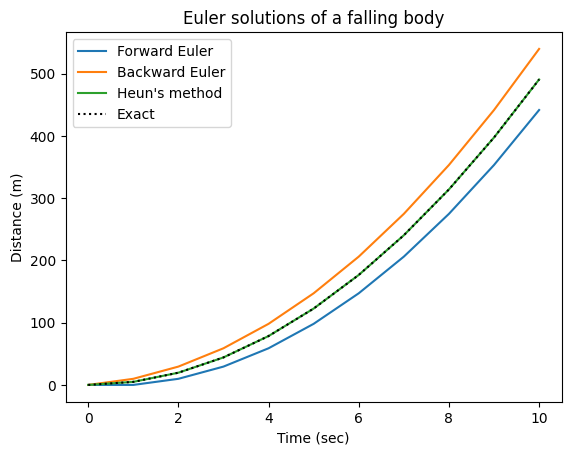

In [8]:
#Heun's solution array
yh=np.zeros(N)

#Initial condition
yh[0]=0.0
#Heun's solution
for i in range(1,N):
  yh[i] = yh[i-1]+(h/2)*(g*(i-1)*h + g*i*h)

plt.plot(t,yf,label="Forward Euler")
plt.plot(t,yb,label="Backward Euler")
plt.plot(t,yh,label="Heun's method")
plt.plot(t,yex,label="Exact", color='k',linestyle='dotted')
plt.xlabel("Time (sec)")
plt.ylabel("Distance (m)")
plt.legend()
plt.title("Euler solutions of a falling body")
plt.show()